In [2]:
from ai_cdss.data_loader import DataLoader
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
loader = DataLoader("app")

In [4]:
df = loader.load_protocol_similarity()
protocol = pd.read_csv("data/protocol_attributes_type.csv")
# protocol_type = pd.read_csv("data/protocol.csv")

INFO:ai_cdss.data_loader:Protocol similarity data loaded successfully.


In [5]:
# Get all unique protocols
protocols = pd.unique(df[["PROTOCOL_A", "PROTOCOL_B"]].values.ravel())

# Initialize square matrix
similarity_matrix = pd.DataFrame(0.0, index=protocols, columns=protocols)

# Fill matrix with similarities
for _, row in df.iterrows():
    a, b, sim = row["PROTOCOL_A"], row["PROTOCOL_B"], row["SIMILARITY"]
    similarity_matrix.at[a, b] = sim
    similarity_matrix.at[b, a] = sim  # assuming symmetric

In [6]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(1 - similarity_matrix)

In [7]:
protocol_names = similarity_matrix.index
id_to_name = protocol[["PROTOCOL_NAME", "PROTOCOL_ID"]].set_index("PROTOCOL_ID").to_dict()["PROTOCOL_NAME"]
id_to_type = protocol[["TYPE", "PROTOCOL_ID"]].set_index("PROTOCOL_ID").to_dict()["TYPE"]

labels = protocol_names.map(id_to_name)
types = protocol_names.map(id_to_type)

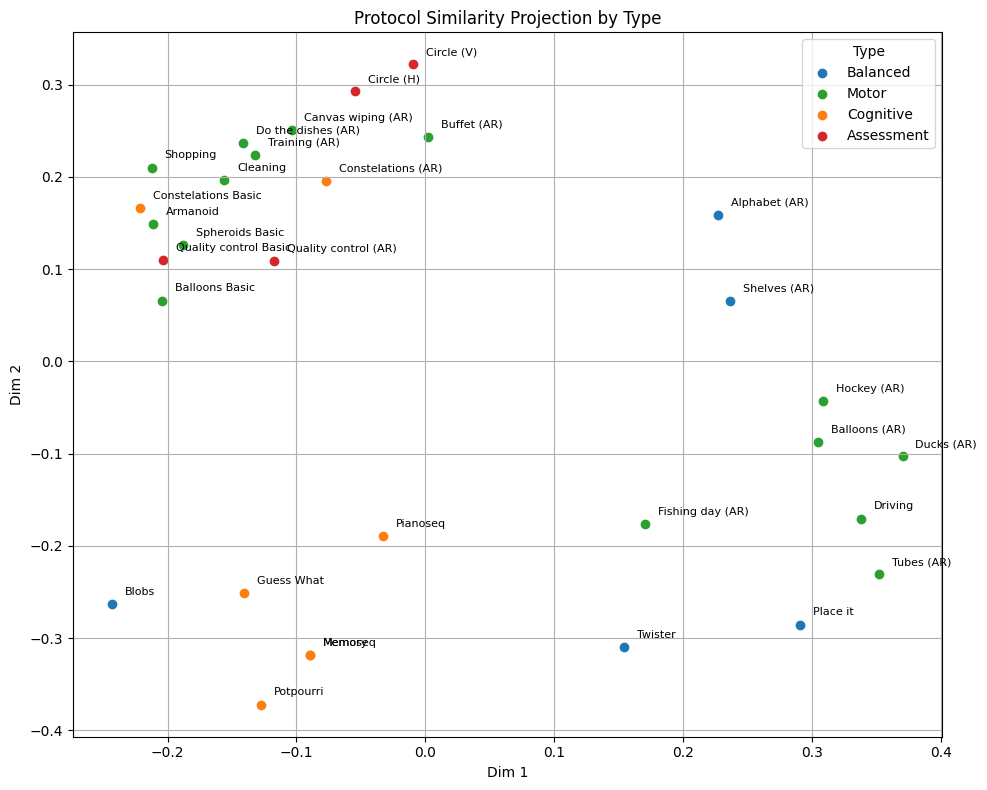

In [8]:
# Plot
plt.figure(figsize=(10, 8))
type_colors = {
    "Balanced": "tab:blue",
    "Motor": "tab:green",
    "Cognitive": "tab:orange",
    "Assessment": "tab:red"
}

for (x, y), label, t in zip(coords, labels, types):
    plt.scatter(x, y, color=type_colors[t], label=t if t not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x + 0.01, y + 0.01, label, fontsize=8)

plt.title("Protocol Similarity Projection by Type")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.legend(title="Type")
plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Example data structure
# coords: numpy array of shape (n, 2)
# labels: list of protocol names
# types: list of protocol types

df_plot = pd.DataFrame({
    'x': coords[:, 0],
    'y': coords[:, 1],
    'Protocol': labels,
    'Type': types
})

# Plot
fig = px.scatter(
    df_plot,
    x='x',
    y='y',
    color='Type',
    text='Protocol',
    title='Protocol Similarity Projection by Type',
    color_discrete_map={
        "Balanced": "blue",
        "Motor": "green",
        "Cognitive": "orange",
        "Assessment": "red"
    }
)

# Optional: make the text appear on hover instead of always on the plot
fig.update_traces(textposition='top center', marker=dict(size=8), hovertemplate="%{text}<br>Type: %{marker.color}")

# Style tweaks
fig.update_layout(
    xaxis_title="Dim 1",
    yaxis_title="Dim 2",
    width=1000,
    height=700,
    legend_title="Type"
)
# Force use of external browser window
pio.renderers.default = 'browser'
fig.show()


Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':0'


In [11]:
fig.write_html("protocol_similarity_plot.html")
